# Regression - Introduction

## Exercise 1: housing regression

### 1.1

Using the *housing.csv* file, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [ ]:
# !pip install statsmodels

In [2]:
# exercise 1.1
import matplotlib.pyplot as plt 
import numpy as np 

from statsmodels.formula.api import ols
import pandas as pd
from patsy import dmatrices


import scipy.stats as sc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


import seaborn as sns 

import statsmodels.api as sm



from sklearn.linear_model import LinearRegression




sns.set()

In [3]:
df = pd.read_csv('../data/housing.csv')

df = df.dropna() 
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [4]:
#3 WORKING
x = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
y = df['PRICE']


In [6]:
#Preparation of values to be used while plotting
min_CRIM = x['CRIM'].min()
mean_CRIM = x['CRIM'].mean()
max_CRIM = x['CRIM'].max()
mean_ZN = x['ZN'].mean() 
mean_INDUS = x['INDUS'].mean()
mean_CHAS = x['CHAS'].mean()
mean_NOX = x['NOX'].mean()
mean_RM = x['RM'].mean()

min_AGE = x['AGE'].min()
mean_AGE = x['AGE'].mean()
max_AGE = x['AGE'].max()


mean_DIS = x['DIS'].mean()
mean_RAD = x['RAD'].mean()
mean_TAX = x['TAX'].mean()
mean_PTRATIO = x['PTRATIO'].mean()
mean_LSTAT = x['LSTAT'].mean()

In [7]:
X = sm.add_constant(x) # y = b + ax [beta_0 beta_1]
model = sm.OLS(y, X).fit()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          2.23e-133
Time:                        14:11:42   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.000      31.919      51.316
CRIM          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
ZN             0.0470      0.014      3.384      0.001       0.020       0.074
INDUS          0.0135      0.062      0.217      0.829      -0.109       0.136
CHAS           2.8400      0.870      3.264      0.001       1.131       4.549
NOX          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
RM             3.6581      0.420      8.705      0.000       2.832       4.484
AGE            0.0036      0.013      0.271      0.787      -0.023       0.030
DIS           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
RAD            0.2894      0.067      4.325      0.000       0.158       0.421
TAX           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
PTRATIO       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
LSTAT         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
y1_predictions = model.predict(X)

The R-Squared = 0.734
meaning the model is not over fitting

### Exercise 1.2: Polynomial features

Use polynomial features to improve your regression model in `exercise 1.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

# AIC , BIC Definitions:

https://www.sciencedirect.com/topics/pharmacology-toxicology-and-pharmaceutical-science/akaike-information-criterion

A good model is the one that has minimum AIC among all the other models. The AIC can be used to select between the additive and multiplicative Holt-Winters models.
Bayesian information criterion (BIC) (Stone, 1979) is another criteria for model selection that measures the trade-off between model fit and complexity of the model. A lower AIC or BIC value indicates a better fit.
The following equations are used to estimate the AIC and BIC (Stone, 1979; Akaike, 1974) of a model:

AIC= -2 * ln(L) + 2*k  (32.18)

BIC= -2 * ln(L) + 2 * ln(N) * k (32.19)

where:

L is the value of the likelihood, 

N is the number of recorded measurements

k is the number of estimated parameters.

>>> There is no value for AIC that can be considered “good” or “bad” because we simply use AIC as a way to compare regression models. The model with the lowest AIC offers the best fit.

In [10]:
#EVALUATION for a 2nd Degree polynomial regression
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(x)
xp.shape

(506, 91)

In [11]:
model2 = sm.OLS(y, xp).fit()
y2_predictions = model2.predict(xp)

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     54.77
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          7.32e-183
Time:                        14:11:46   Log-Likelihood:                -1196.8
No. Observations:                 506   AIC:                             2574.
Df Residuals:                     416   BIC:                             2954.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -161.9883     80.632     -2.009      0.045    -320.485      -3.491
x1            -5.9779      7.059     -0.847      0.398     -19.854       7.899
x2             0.3145      0.393      0.801      0.424      -0.458       1.087
x3            -4.0845      1.768     -2.310      0.021      -7.559      -0.609
x4            34.1509      9.909      3.446      0.001      14.673      53.629
x5           176.7024    125.273      1.411      0.159     -69.545     422.950
x6            20.1502      7.892      2.553      0.011       4.638      35.663
x7             0.5921      0.268      2.212      0.027       0.066       1.118
x8            -5.8499      4.483     -1.305      0.193     -14.661       2.962
x9             1.7117      2.398      0.714      0.476      -3.002       6.425
x10           -0.0034      0.115     -0.030      0.976      -0.229       0.223
x11            7.8798      3.919      2.010      0.045       0.176      15.584
x12            0.2844      0.835      0.341      0.733      -1.356       1.925
x13            0.0016      0.001      1.310      0.191      -0.001       0.004
x14            0.1515      0.198      0.766      0.444      -0.237       0.540
x15            0.4189      0.476      0.880      0.379      -0.517       1.355
x16            2.2430      0.563      3.987      0.000       1.137       3.349
x17           -1.5517      0.845     -1.837      0.067      -3.212       0.109
x18            0.1517      0.056      2.716      0.007       0.042       0.261
x19            0.0038      0.003      1.096      0.274      -0.003       0.011
x20            0.0661      0.086      0.764      0.445      -0.104       0.236
x21            0.3385      0.634      0.534      0.593      -0.907       1.584
x22           -0.0302      0.047     -0.648      0.517      -0.122       0.061
x23            0.4588      0.334      1.374      0.170      -0.197       1.115
x24            0.0235      0.006      4.013      0.000       0.012       0.035
x25           -0.0002      0.001     -0.362      0.718      -0.001       0.001
x26           -0.0049      0.005     -0.961      0.337      -0.015       0.005
x27           -0.0377      0.065     -0.582      0.561      -0.165       0.090
x28           -0.6779      0.627     -1.082      0.280      -1.909       0.554
x29            0.0098      0.028      0.355      0.723      -0.045       0.064
x30            0.0002      0.001      0.248      0.805      -0.002       0.002
x31           -0.0136      0.010     -1.390      0.165      -0.033       0.006
x32           -0.0056      0.007     -0.783      0.434      -0.019       0.008
x33            0.0006      0.000      2.937      0.003       0.000       0.001
x34           -0.0057      0.008     -0.742      0.459      -0.021       0.009
x35           -0.0051      0.005     -1.123      0.262      -0.014       0.004
x3

In [12]:
#2nd trial with 2nd Degree polynomial regression

In [13]:
PRICE_y = df['PRICE']
AGE_x = df['AGE']
#1- Function to split training data vs Testing data
x_train, x_test, y_train, y_test = train_test_split(PRICE_y, AGE_x, test_size=0.3)
# The test size was change to 100% because we won't be using the test data and predict method

#2- Concerting the training and Testing data into 2 DataFrame
x_train_df = pd.DataFrame(x_train) #X for which the model was trained
x_test_df = pd.DataFrame(x_test) #X for which the model was not trained so we can compare the error

#3- Getting the x-axis for 2nd degree polynomial features on both train and Test data
x_test_xp =  PolynomialFeatures(degree=2).fit_transform(x_test_df)
x_train_xp = PolynomialFeatures(degree=2).fit_transform(x_train_df)

#4- Getting the Model
model2_bis = LinearRegression()
model2_bis = model2_bis.fit(x_train_xp, y_train)

#5- Getting the Slopes / Intercept
coef = model2_bis.coef_
intercept = model2_bis.intercept_ 

print(coef)
print(intercept)



[ 0.         -6.07518108  0.09125332]
150.9627840253093


In [14]:
#EVALUATION for a 3rd Degree polynomial regression

polynomial_features= PolynomialFeatures(degree=3)
xp = polynomial_features.fit_transform(x)
xp.shape

(506, 455)

In [15]:
model3 = sm.OLS(y, xp).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     23.79
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           2.39e-53
Time:                        14:11:51   Log-Likelihood:                -720.64
No. Observations:                 506   AIC:                             2227.
Df Residuals:                     113   BIC:                             3888.
Df Model:                         392                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.461e+04   2.89e+04     -0.506      0.614   -7.18e+04    4.26e+04
x1          5672.2464   5202.973      1.090      0.278   -4635.782     1.6e+04
x2          -715.1450    684.385     -1.045      0.298   -2071.035     640.745
x3         -8286.5970   6291.681     -1.317      0.190   -2.08e+04    4178.359
x4            -0.3173      1.859     -0.171      0.865      -4.000       3.365
x5         -6877.5629   1.75e+04     -0.393      0.695   -4.16e+04    2.78e+04
x6           892.9696    822.911      1.085      0.280    -737.366    2523.305
x7            14.8580     25.656      0.579      0.564     -35.972      65.688
x8           887.5784   1201.369      0.739      0.462   -1492.550    3267.707
x9          -1.04e+04   3.23e+04     -0.322      0.748   -7.44e+04    5.36e+04
x10          527.9721    758.947      0.696      0.488    -975.638    2031.582
x11          -81.8663   7047.161     -0.012      0.991    -1.4e+04    1.39e+04
x12          -21.6579    128.811     -0.168      0.867    -276.855     233.539
x13          -71.0813    116.184     -0.612      0.542    -301.262     159.099
x14          127.0134     83.182      1.527      0.130     -37.784     291.811
x15          -54.3447    127.846     -0.425      0.672    -307.630     198.940
x16            0.2525      0.593      0.426      0.671      -0.922       1.427
x17         2074.9755   5563.378      0.373      0.710   -8947.079    1.31e+04
x18          -62.7107     56.199     -1.116      0.267    -174.052      48.631
x19           -4.6537      3.442     -1.352      0.179     -11.473       2.166
x20         -164.7652     85.616     -1.924      0.057    -334.386       4.855
x21         -260.3867    315.458     -0.825      0.411    -885.366     364.592
x22            0.6328     10.288      0.062      0.951     -19.750      21.016
x23         -473.8063    448.248     -1.057      0.293   -1361.867     414.255
x24           -6.0595      8.525     -0.711      0.479     -22.948      10.829
x25            1.3860      1.479      0.937      0.351      -1.544       4.316
x26           -0.4517     30.663     -0.015      0.988     -61.200      60.296
x27           -0.0405      0.125     -0.323      0.747      -0.289       0.208
x28         -328.6591    973.655     -0.338      0.736   -2257.644    1600.326
x29           10.7135      7.761      1.380      0.170      -4.662      26.089
x30            0.3856      0.358      1.077      0.284      -0.324       1.095
x31            9.7044     15.761      0.616      0.539     -21.520      40.929
x32           25.9970    112.618      0.231      0.818    -197.119     249.113
x33           -2.0878      1.867     -1.118      0.266      -5.786       1.611
x34           99.9096     93.176      1.072      0.286     -84.688     284.508
x35            0.1784      1.435      0.124      0.901      -2.665       3.022
x3

In [16]:
print('model1 : R-squared:', model.rsquared, ' The model fits normally')
print('model2 : R-squared:', model2.rsquared, ' The model overfits')
print('model3 : R-squared:', model3.rsquared, ' The model overfits')
print('\n')
print('AIC Model1:', model.aic, ' > ', model2.aic, ' AIC model2' )
print('BIC Model1:', model.bic, ' > ', model2.bic, 'BIC Model2')
print('\n')
print('AIC Model2', model2.aic, ' > ', model3.aic, ' AIC model3' )
print('BIC Model2', model2.bic, ' < ', model3.bic, 'BIC Model3')

model1 : R-squared: 0.7343070437613075  The model fits normally
model2 : R-squared: 0.9213737830057599  The model overfits
model3 : R-squared: 0.9880295508523955  The model overfits


AIC Model1: 3035.8206794796506  >  2573.696788164053  AIC model2
BIC Model1: 3090.765656180388  >  2954.085088399925 BIC Model2


AIC Model2 2573.696788164053  >  2227.271127391191  AIC model3
BIC Model2 2954.085088399925  <  3888.300038421165 BIC Model3


In [17]:
#CONCLUSION

# The model2 has the lowest AIC and BIC with R-Squared showing it overfits



### Exercise 1.3: Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.
- The y axis on each chart is the target value (house price)
- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each
- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well
- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

In [18]:
# exercise 1.3
#The AGE is one of the features that have a great impact on the price

# The plot is a 12 dimensions plot into a 2D plot. See previous exercise 1.2 for the 2D plot.
"""x_age = np.linspace(min_AGE,max_AGE,506)
sns.scatterplot(x='AGE', y='PRICE', data=df)
sns.lineplot(x=x_age, y=y2_predictions, color='r')
plt.title('Predicted House Price vs Age')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()"""

"x_age = np.linspace(min_AGE,max_AGE,506)\nsns.scatterplot(x='AGE', y='PRICE', data=df)\nsns.lineplot(x=x_age, y=y2_predictions, color='r')\nplt.title('Predicted House Price vs Age')\nplt.xlabel('Age')\nplt.ylabel('Price')\nplt.show()"

In [19]:
# We won't use this in the visualization because we are in 2D only
# y2_bis = model2_bis.predict(np.array(x_test_xp))

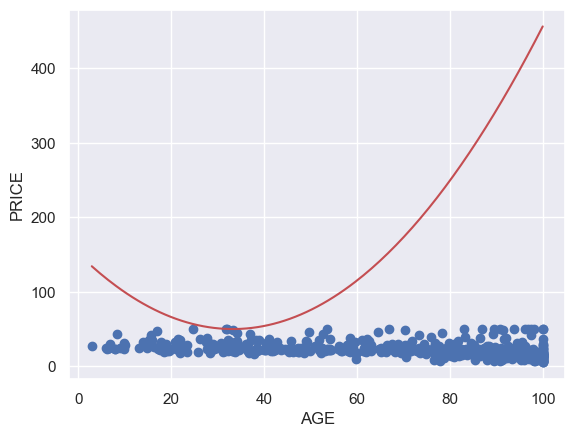

In [20]:
x2_bis_axis = np.linspace(min_AGE,max_AGE,167)

#2nd degree polynomial : y = c + bx + ax^2
y_poly_2ndDegree = intercept + coef[1]*x2_bis_axis + coef[2]*x2_bis_axis**2

#PLOTTING
plt.scatter(AGE_x, PRICE_y, color='b')
plt.plot(x2_bis_axis, y_poly_2ndDegree, 'r')
#plt.xlim(0,60)
#plt.ylim(0,150)
plt.xlabel('AGE')
plt.ylabel('PRICE')
plt.show()

## Exercise 2: Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **1.3**, but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

In [ ]:
# exercise 2
#The AGE, the NOX, the DIS, the TAX are amoung the greatest factors (based on their P>0.5)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
#y2_predictions = model2.predict(xp)

def reg_plot_on_ax(feature_1, ax):
    min_ft = df[feature_1].min()
    max_ft = df[feature_1].max()
    
    x = np.linspace(min_ft,max_ft,506)
    sns.scatterplot(x=str(feature_1), y='PRICE', data=df, ax=ax)
    sns.lineplot(x=x, y=y2_predictions, color='r', ax=ax)
    ax.set_title(feature_1)
    ax.set_xlabel(feature_1, labelpad=10)
    ax.set_ylabel('Price', labelpad=10)


list_ft = ['AGE', 'NOX', 'DIS', 'TAX']
axes = [ax1, ax2, ax3, ax4]  
              
for ft, ax in zip(list_ft,axes):
    reg_plot_on_ax(ft, ax)

plt.show()